<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Natural Language Processing: Classification
              
</p>
</div>

Data Science Cohort Live NYC July 2022
<p>Phase 4: Topic 39</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.pardir)
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [3]:
import numpy as np
import pandas as pd

# importing text preprocessing libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer


In [4]:
# integrating our preprocessing into a pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

Build a very simple stateless transformer:
- Cleans/preprocesses text

In [7]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        #define attributes to store if text preprocessing requires fitting from data
        pass
    
    def fit(self, data, y = 0):
        # this is where you would fit things like corpus specific stopwords
        # fit probable bigrams with bigram model in here
        
        # save as parameters of Text preprocessor
        
        return self
    
    def transform(self, data, y = 0):
        fully_normalized_corpus = data.apply(self.process_doc)
        
        return fully_normalized_corpus
        
    
    def process_doc(self, doc):

        #initialize lemmatizer
        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        # helper function to change nltk's part of speech tagging to a wordnet format.
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None
            # remove stop words and punctuations, then lower case
        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

        #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize

        # creates list of tuples with tokens and POS tags in wordnet format
        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [8]:
data = pd.read_csv('Data/satire_nosatire.csv')
X = data['body']
y = data['target']

In [9]:
# no need to split the data unless you want to do sg extra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

proc = TextPreprocessor()

# again this kind of splitting only becomes important if fitting of text transformers fits to statistics of the text corpus
transformed_train = proc.fit_transform(X_train) 


In [49]:
type(X_train)

pandas.core.series.Series

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [11]:
# count vectorizer
prc_steps = [('countvec', CountVectorizer(min_df = 0.05, max_df = 0.95))]
preprocess_pipeline = Pipeline(prc_steps)

In [12]:
X_tr_proc = preprocess_pipeline.fit_transform(transformed_train)

In [48]:
type(X_tr_proc)

scipy.sparse.csr.csr_matrix

In [13]:
X_tr_proc

<700x596 sparse matrix of type '<class 'numpy.int64'>'
	with 44477 stored elements in Compressed Sparse Row format>

In [14]:
type(X_tr_proc)

scipy.sparse.csr.csr_matrix

In [15]:
feat_names = preprocess_pipeline[
    'countvec'].get_feature_names_out()

pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)

,able,accord,account,accuse,act,action,actually,add,additional,administration,...,woman,word,work,worker,world,write,year,yes,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,0,0,1,0,2,3,2,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
696,0,0,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
698,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


#### Building a document classifier model

**Naive Bayes with Multinomial Distribution Likelihood**

- Can be effective for modeling document-term frequency matrix to target class relationships

Bayes theorem:

$$ P(c|\textbf{x}) = \frac{P(\textbf{x}|c)P(c)}{P(\textbf{x})} $$

- Likelihood; $P(\textbf{x}|c)$
- Prior: $P(c)$
- Posterior: $P(c|\textbf{x}) $

Bayes classifier:
    
$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} P(\textbf{x}|c)P(c)$$

#### Prior
- simply the target fraction

In [16]:
class_priors = y_train.value_counts()/y_train.shape[0]
class_priors

0    0.507143
1    0.492857
Name: target, dtype: float64

#### The likelihood function

**First step: word count distribution**:

- Multinomial distribution (generalization of 
binomial distribution)

For document with $m$ tokens:
- dictionary of corpus has $d$ unique tokens.
- $\textbf{x} = (x_1,...., x_d)$ vector of token counts for document.



An analogy: $d = 6$ M&M colors

Picking $ m $ M&Ms.

<img src = "Images/picking_candy.jpg" >
    
Follow multinomial distribution.


<a href = "https://www.mashed.com/679227/the-rarest-mm-color-may-surprise-you/#:~:text=Brown%20is%20currently%20the%20rarest%20color%20of%20M%26M's&text=As%20such%2C%20they%20used%20their,their%20findings%20were%20quite%20surprising."> Some interesting facts about M&Ms. </a>

$$ P(\textbf{x}|\theta) = \frac{m!}{x_1!x_2!...x_d!} \theta_{1}^{x_1}\theta_{2}^{x_2}...\theta_{d}^{x_d} $$
Parameters of distribution:
- $\theta_i$: probability of picking $i^{th}$ token  in dictionary from bag of words

**To be estimated from the data**

Words draws/order are **independent** of each other: the **naive** assumption.

<img src = "Images/scrabble.webp" />

#### Second Step: class conditional word count

$$ P(\textbf{x}|c) = \frac{m!}{x_1!x_2!...x_d!} [\theta_c]_{1}^{x_1}[\theta_c]_{2}^{x_2}...[\theta_c]_{d}^{x_d} $$
- $[\theta_c]$ is **class-dependent** set of probability parameters.

Need to fit probability parameters from data.

**Fitting probability parameters for each class**

- Very straightforward.
- Probability of drawing token $i$ if document class $c$

$$ [\hat{\theta}_c]_i = \frac{N_{ci}}{N_c}$$

- Count token $i$ occurence across all documents of class $c$
- Divide by total token count for all documents of class $c$

#### Getting the fit parameters with code

In [17]:
bow_mat = pd.DataFrame(X_tr_proc.toarray(), columns = feat_names)
bow_mat['target'] = y_train
bow_mat

,able,accord,account,accuse,act,action,actually,add,additional,administration,...,woman,word,work,worker,world,write,year,yes,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,0
1,0,0,0,0,0,1,0,1,1,0,...,0,0,1,0,2,3,2,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
696,0,0,0,1,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
698,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
class1_bow_mat = bow_mat[bow_mat['target'] == 1].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_1 = class1_bow_mat.sum(axis = 0) # token occurence
N_1 =  class1_bow_mat.values.sum() # number of tokens

# get probabilities for each token: class 1
proba_c1 = N_tok_1/N_1

proba_c1.sort_values(ascending = False)[0:10]

say           0.033223
year          0.010714
people        0.009124
trump         0.008013
state         0.007743
government    0.007383
president     0.007143
make          0.007143
also          0.007053
take          0.007053
dtype: float64

In [19]:
class0_bow_mat = bow_mat[bow_mat['target'] == 0].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_0 = class0_bow_mat.sum(axis = 0)
N_0 =  class0_bow_mat.values.sum() 

# get probabilities for each token: class 0
proba_c0 = N_tok_0/N_0

proba_c0.sort_values(ascending = False)[0:10]

say           0.029633
people        0.010247
year          0.008877
trump         0.008811
take          0.008093
state         0.007963
government    0.007832
country       0.007832
eu            0.007571
see           0.007441
dtype: float64

#### Computing likelihood

In [20]:
from scipy.stats import multinomial

Take document:

In [21]:
X_train.iloc[50]

' U.S. Treasury Secretary Steven Mnuchin said on Saturday that President Donald Trump told him he had “never suggested firing” the chairman of the U.S. Federal Reserve. Mnuchin said in a tweet that Trump had told him that he “never suggested firing” Fed Chairman Jerome Powell. Trump also told Mnuchin he did not believe he had the right to fire Powell. Sources had told Reuters on Saturday that Trump had privately discussed the possibility of firing Powell, a move that could roil already volatile financial markets.'

In [22]:
# bow vector for document
bow_mat_feat = bow_mat.drop(columns = ['target'])
word_vec = bow_mat_feat.iloc[50]
word_vec

able       0
accord     0
account    0
accuse     0
act        0
          ..
write      0
year       0
yes        0
yet        0
young      0
Name: 50, Length: 595, dtype: int64

This is satire.

In [23]:
y_train.iloc[50]

0

In [24]:
article_length = word_vec.sum()
article_length

34

In [25]:
class1_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c1.values)
class0_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c0.values)

Now use Bayes theorem for classifier:

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} P(\textbf{x}|c)P(c)$$


with multinomial likelihood

$$ P(\textbf{x}|c) = \frac{m!}{x_1!x_2!...x_d!} [\hat{\theta}_c]_{1}^{x_1}[\hat{\theta}_c]_{2}^{x_2}...[\hat{\theta}_c]_{d}^{x_d} $$

and fitted parameters

$$ [\hat{\theta}_c]_i = \frac{N_{ci}}{N_c}$$

Evaluate class for this document:

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} P(\textbf{x}|c)P(c)$$

In [26]:
class1_likelihood*class_priors[1]

3.900650936083197e-55

In [27]:
class0_likelihood*class_priors[0]

4.260899025920421e-56

Given scale of probabilities:
- Comparison done on log scale

$$f(\textbf{x}) = \hat{c} = \underset{c \in C}{\arg\max} \Big[ \log\Big(P(\textbf{x}|c)P(c)\Big) \Big]$$

In [28]:
np.log10(class1_likelihood*class_priors[1])

-54.40886291236849

In [29]:
np.log10(class0_likelihood*class_priors[0])

-55.37049875751632

#### Laplace Smoothing: practical correction

- A fudge count $\alpha$ added to token count in each class.
- Avoids issues with having zero counts $N_c$ and $N_{ci}$ in training set.

$$ [\hat{\theta}_c]_i = \frac{N_{ci} + \alpha}{N_c + \alpha d}$$

- Typically $\alpha = 1$. Can tune this.

- $d$ is the dimensionality of our vocabulary
- $N_{ci}$ the count of token $i$ in class $c$
- $N_{c}$ the count of all tokens in class $c$

Append Multinomial Naive Bayes Classifier to pipeline.

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
from copy import deepcopy
mod_pipe = deepcopy(preprocess_pipeline)
mod_pipe.steps.append(('multinb', MultinomialNB()))
mod_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [32]:
mod_pipe.fit(transformed_train, y_train)

Pipeline(steps=[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
                ('multinb', MultinomialNB())])

In [33]:
transformed_test = proc.transform(X_test)

y_pred = mod_pipe.predict(transformed_test) # automatically applies transforms and predicts on test

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       145
           1       0.98      0.95      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [35]:
roc_auc_score(y_test, y_pred)

0.9670745272525028

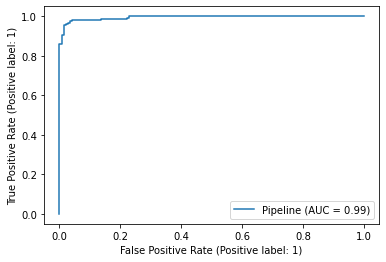

In [36]:
#plot_roc_curve(mod_pipe, X_test, y_test)
RocCurveDisplay.from_estimator(mod_pipe, transformed_test, y_test)

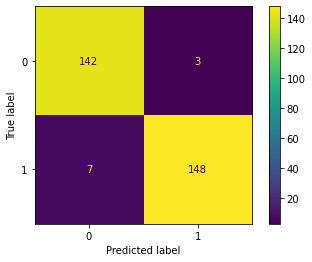

In [37]:
#plot_confusion_matrix(mod_pipe, X_test, y_test);
ConfusionMatrixDisplay.from_estimator(mod_pipe, transformed_test, y_test);

- with proper text preprocessing steps
- Naive Bayes can perform really well on simple binary classification tasks.

#### Using TF-IDF

TFIDF does not necessarily perform better than CV:
- It is just a tool in our toolbelt often worth trying out.

In [38]:
from copy import deepcopy
tfidfmod_pipe = deepcopy(mod_pipe)
tfidfmod_pipe.steps[0] = ('tfidf', TfidfVectorizer(min_df=0.05, max_df=0.95)) # cuts words too rare/too frequent
tfidfmod_pipe.steps

[('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [39]:
tfidfmod_pipe.fit(transformed_train, y_train)
ypred_tfidf = tfidfmod_pipe.predict(transformed_test)

In [40]:
roc_auc_score(y_test, ypred_tfidf)

0.9668520578420468

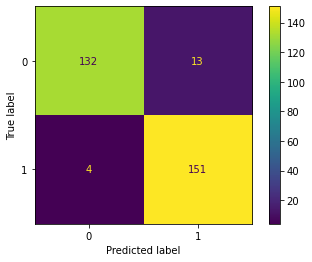

In [41]:
#plot_confusion_matrix(tfidfmod_pipe, X_test, y_test);
ConfusionMatrixDisplay.from_estimator(tfidfmod_pipe, X_test, y_test);

#### With class imbalance

- Modification to Multinomial Naive Bayes: Complement Naive Bayes
- deals with data skew.

In [42]:
from sklearn.naive_bayes import ComplementNB

Pretty much same fitting/hyperparameters.

In [43]:
from copy import deepcopy
mod_comp_pipe = deepcopy(preprocess_pipeline)
mod_comp_pipe.steps.append(('compnb', ComplementNB()))
mod_comp_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('compnb', ComplementNB())]

In [44]:
mod_comp_pipe.fit(transformed_train, y_train)



Pipeline(steps=[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
                ('compnb', ComplementNB())])

In [45]:
transformed_test = proc.transform(X_test)
y_pred_comp = mod_comp_pipe.predict(X_test)

In [46]:
print(classification_report(y_pred_comp, y_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       136
           1       0.97      0.92      0.95       164

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300



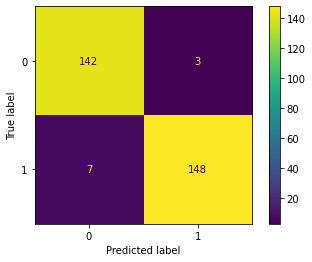

In [47]:
#plot_confusion_matrix(mod_comp_pipe, transformed_test, y_test);
ConfusionMatrixDisplay.from_estimator(mod_comp_pipe, transformed_test, y_test);

Comparable performance on this balanced dataset. Will perform *much* better on imbalanced dataset than MultinomialNB